<a href="https://colab.research.google.com/github/williamfbray/William-Bray-/blob/main/Unilateral_Will.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# prompt: !pip install -U -q google-generativeai # Install the Python SDK
# import google.generativeai as genai
# from google.colab import userdata

# GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')
# genai.configure(api_key=GOOGLE_API_KEY)

!pip install -U -q google-generativeai # Install the Python SDK
import google.generativeai as genai
from google.colab import userdata
GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')
genai.configure(api_key=GOOGLE_API_KEY)

!pip install boruta

# combine menieres with 'menieres disease' congenital congenital progr w cong Prog
# combine trauma etiology, combine ototoxic/radiation w radiation, congenitals

# combine mixed and unknown HLprg, combine gradual and progressive/gradual

# Cleaning and Imports

<ipython-input-2-d847cc03c3f6>:101: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'True' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[(df['CNC']<=40),'CNC candidate']=True
<ipython-input-2-d847cc03c3f6>:131: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].fillna('blank')
<ipython-input-2-d847cc03c3f6>:101: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'True' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[(df['CNC']<=40),'CNC candidate']=True
<ipython-input-2-d847cc03c3f6>:131: SettingWithC

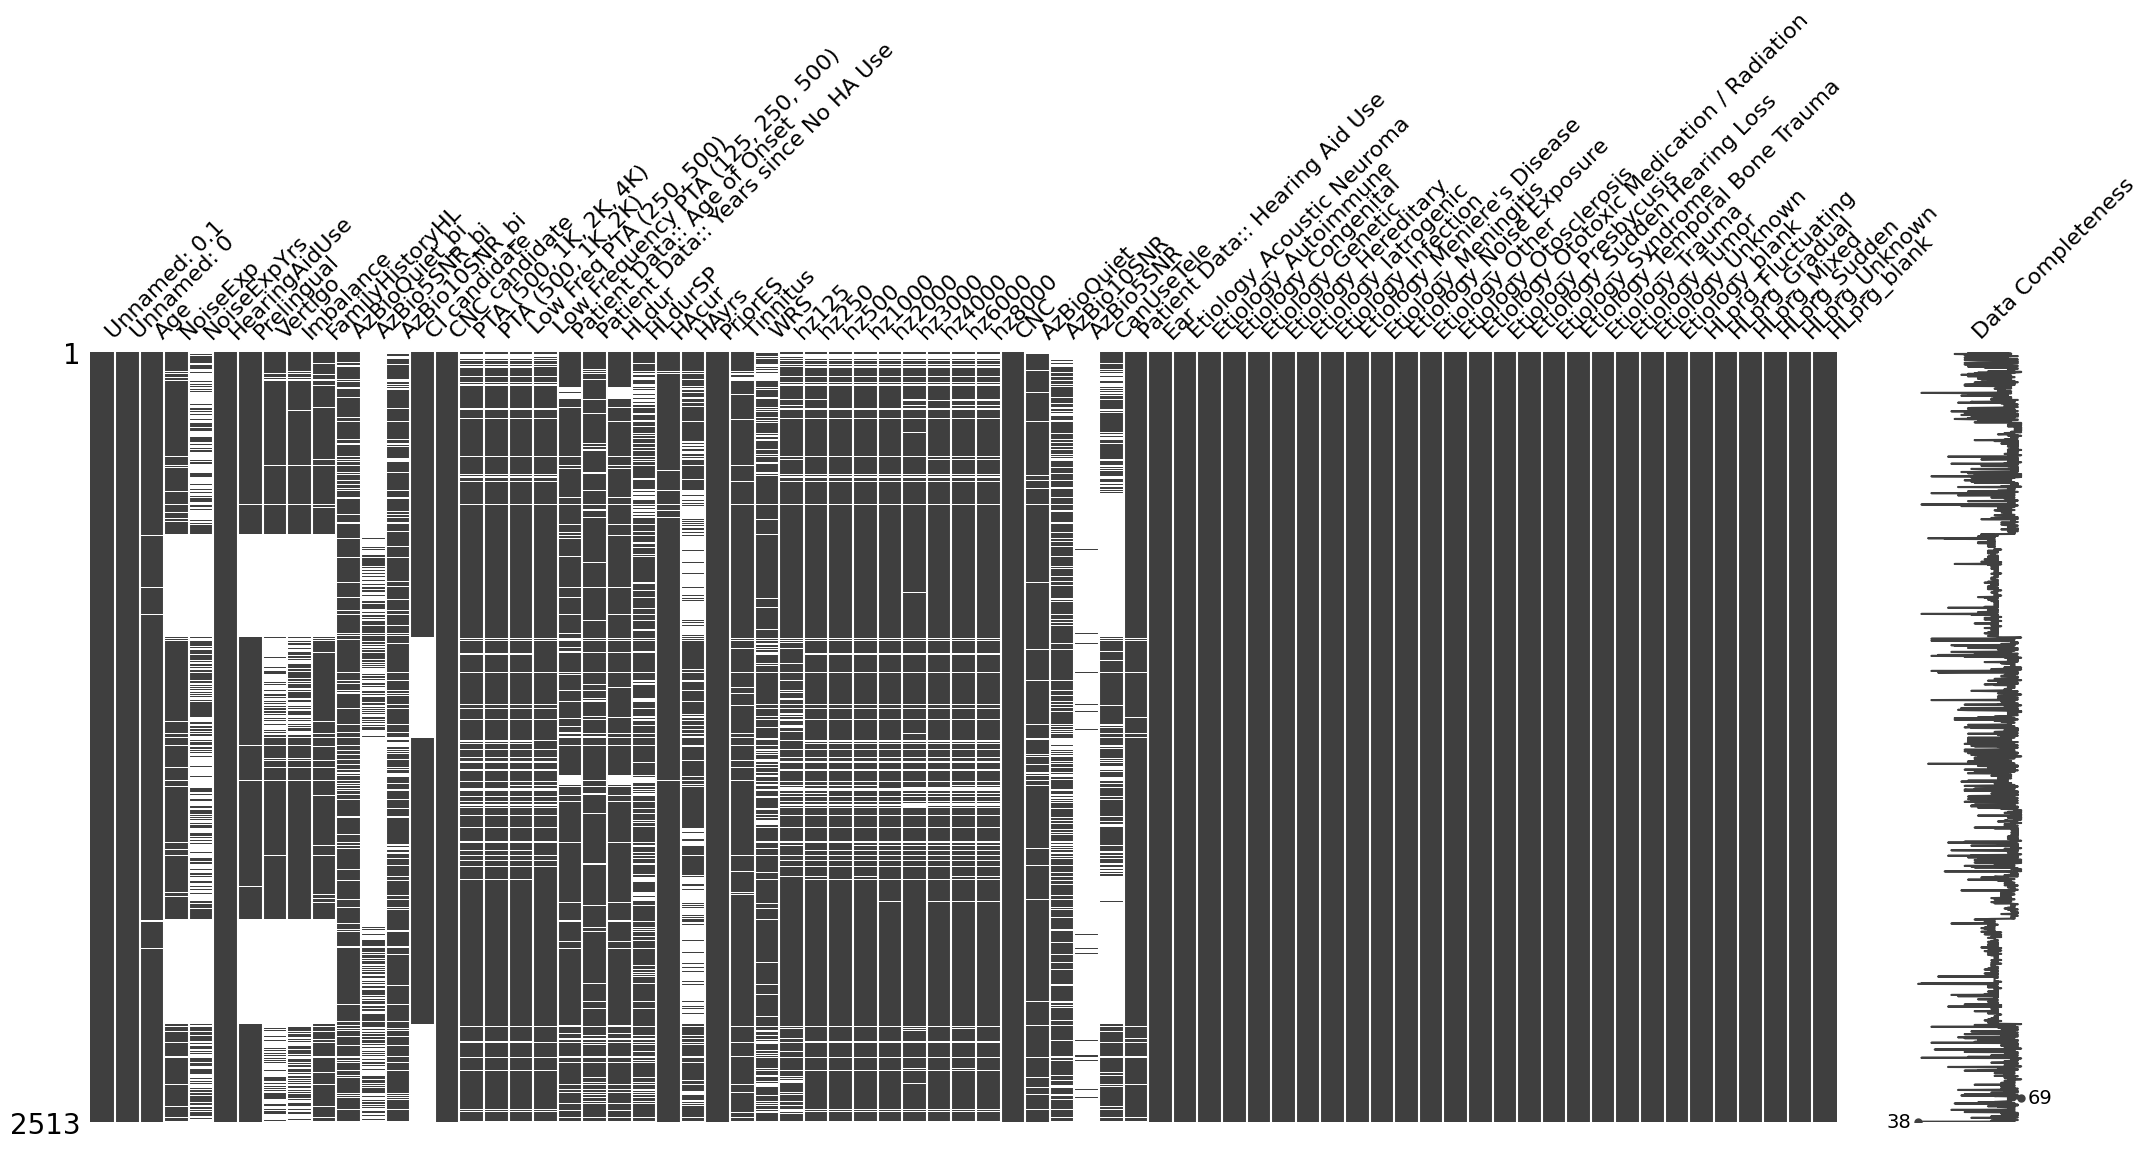

In [ ]:
import sklearn
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import math
import missingno as msno
#Merged_df=pd.read_excel(r"/content/WUSM&Old_CI_Merged_imputed(5).xlsx")
#all col also has cleaned Yrs since no HA use columns

Unilateral_df_raw=pd.read_excel(r"/content/UnilateralCI_all(1).xlsx")
Non_azCNC_filtered_unil=pd.read_excel(r"/content/etiology_Unilateral_df_All(2).xlsx")
# import sklearn packages
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xbg
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_curve
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import PrecisionRecallDisplay
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
cat_col=[
    'Etiology',
    'Etiology',
    'HLprg',
    'HLprg'
]
num_col=[
    'Age',
    'NoiseExpYrs',
 #   'CNC_bi',#100
 #####wordscore   'AzBioQuiet_bi',#100
 #   'AzBio5SNR_bi',#100
 #####wordscore    'AzBio10SNR_bi',
   # 'MOCA',
    'PTA (500, 1K, 2K, 4K)',#125
    'PTA (500, 1K, 2K)',#125
    ' Low Freq PTA (250, 500)',#125
    ' Low Frequency PTA (125, 250, 500)',#125
    'Patient Data:: Age of Onset',#
    'Patient Data:: Years since No HA Use',
    'HLdur',#
    'HLdurSP',#
    'HAyrs',#  deal with -0.1 value, ask Dr. Shew
    'WRS',#
    'hz125',#125
    'hz250',
    'hz500',
    'hz1000',
    'hz2000',
    'hz3000',
    'hz4000',
    'hz6000',
    'hz8000',
 #####wordscore    'CNC_L',#100
  #####wordscore   'CNC_R',#100
  #####wordscore   'AzBioQuiet_L',#100
   #####wordscore  'AzBioQuiet_R',#100
   #####wordscore  'AzBio10SNR_L',#100
   #####wordscore  'AzBio10SNR_R',#100
 #   'AzBio5SNR_L',#100
 #   'AzBio5SNR_R',
]
binary_col=[
    'NoiseExp',
#    'NoiseExpYrs',
    'HearingAidUse',
    'Prelingual',
    'Vertigo',
    'Imbalance',
    'FamilyHistoryHL',
    'HAcur',
    'HAcur',
    'Tinnitus',
    'CanUseTele',
    'Patient Data:: Hearing Aid Use',
    'PriorES'
    ]
#if imputing values-- remove 99 placeholder as np.nan for now
def cleaning(df):
  for col in num_col:
    df[col]=df[col].replace(99,np.nan)
  for col in binary_col:
    df[col]=df[col].replace(99,np.nan)

  df.loc[(df['CNC']<=40),'CNC candidate']=True
  df.loc[(df['CNC']>40),'CNC candidate']=False
  binary_dict={'Yes':1, 'No':0, True:1,False:0}
  df['CI candidate']=df['CI candidate'].replace(binary_dict)
  df['CNC candidate']=df['CNC candidate'].replace(binary_dict)
  df['HLprg']=df['HLprg'].replace('Progressive/Gradual','Gradual')
  df['HLprg']=df['HLprg'].replace('Progressive / Gradual','Gradual')
  df['Etiology']=df['Etiology'].replace('Congenital Congenital Progressive','Congenital Progressive')
  df['Etiology']=df['Etiology'].replace('Menieres',"Meniere's Disease")
  df['Etiology']=df['Etiology'].replace('SSNHL',"Sudden Hearing Loss")
  df['Etiology']=df['Etiology'].replace('NoiseExposure',"Noise Exposure")
  df['Etiology']=df['Etiology'].replace('Acoustic Trauma','Trauma')
  df['Etiology']=df['Etiology'].replace('Presbycusis\nAcoustic Trauma\nOther\nNoise Exposure','Presbycusis\nTrauma\nOther\nNoise Exposure')
  df['Etiology']=df['Etiology'].replace( 'Skull Base Tumor / Lesion (other than Acoustic Neuroma)\nAcoustic Trauma','Skull Base Tumor / Lesion (other than Acoustic Neuroma)\nTrauma')
  df['Etiology']=df['Etiology'].replace('Acoustic Trauma\nSudden Hearing Loss','Trauma\nSudden Hearing Loss')
  df['Etiology']=df['Etiology'].replace('Presbycusis\nNoise Exposure\nAcoustic Trauma\nOther','Presbycusis\nNoise Exposure\nTrauma\nOther')
  df['Etiology']=df['Etiology'].replace('Congenital Prematurity','Congenital')
  df['Etiology']=df['Etiology'].replace('Congenital Progressive','Congenital')
  df['Etiology']=df['Etiology'].replace('Congenital\nCongenital Progressive','Congenital')
  df['Etiology']=df['Etiology'].replace('Congenital\nCongenital','Congenital')
  df['Etiology']=df['Etiology'].replace('Congenital Progressive\nNoise Exposure','Congenital\nNoise Exposure')
  df['Etiology']=df['Etiology'].replace('Presbycusis\nCongenital Progressive\nNoise Exposure','Presbycusis\nCongenital\nNoise Exposure')
  replace_dict_etiology={'Radiation':'Ototoxic Medication / Radiation', 'Radiation\nGenetic':'Ototoxic Medication / Radiation\nGenetic','Genetic\nRadiation':'Ototoxic Medication / Radiation\nGenetic'}
  df['Etiology']=df['Etiology'].replace(replace_dict_etiology)
  return df
def one_hot_encode_multicategories(df):
    # Replace NaN with a placeholder string
    cat_cols=['Etiology',
    'HLprg',]
    for col in cat_cols:
        df[col] = df[col].fillna('blank')
    # Split the values into individual components
        split_data = df[col].str.split('\n', expand=True)
    # Stack the split data, then get dummy variables
        stacked_data = split_data.stack().reset_index(level=1, drop=True)
        dummy_df = pd.get_dummies(stacked_data, prefix=col).groupby(level=0).sum()
    # Merge the dummy variables back into the original dataframe
        df = df.drop(columns=[col]).join(dummy_df)
    return df
def cand_fix_CNC(df):
    df = df.dropna(subset='CNC', how='all')
    return df
def cand_fix_CI(df):
    df = df.dropna(subset='CI candidate', how='all')
    return df
def prepare_dataset_CNC(df):
  df=cleaning(df)
  df=cand_fix_CNC(df)
  df=one_hot_encode_multicategories(df)
  return df
def prepare_dataset_CI(df):
  df=cleaning(df)
  df=cand_fix_CI(df)
  df=one_hot_encode_multicategories(df)
  return df
#Unilateral_export_df=cleaning(Unilateral_df_raw)
#Unilateral_export_df.to_excel('Unilateral_export_df.xlsx', index=True)
Unilateral_df=prepare_dataset_CNC(Unilateral_df_raw)
Unilateral_Az=prepare_dataset_CI(Non_azCNC_filtered_unil)
msno.matrix(Unilateral_df, labels=True)
plt.show()


# XGB Model

accuracy: 0.825050
xgb.cv_Accuracy: 0.836338
[[ 59  61]
 [ 27 356]]
              precision    recall  f1-score   support

         0.0       0.69      0.49      0.57       120
         1.0       0.85      0.93      0.89       383

    accuracy                           0.83       503
   macro avg       0.77      0.71      0.73       503
weighted avg       0.81      0.83      0.81       503

Accuracy: 83.17% (3.13%)


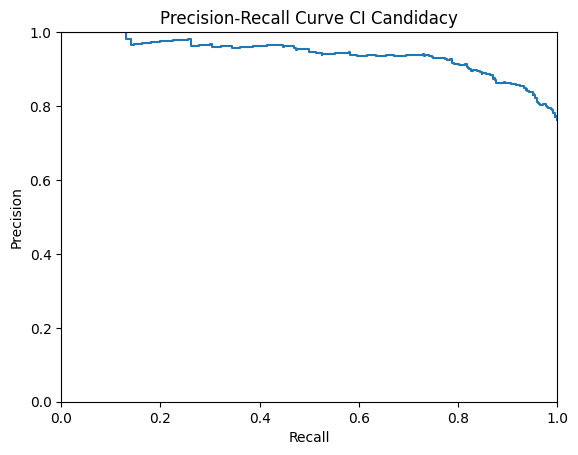

Best Precision: 0.8387096774193549
Best Recall: 0.9503916449086162


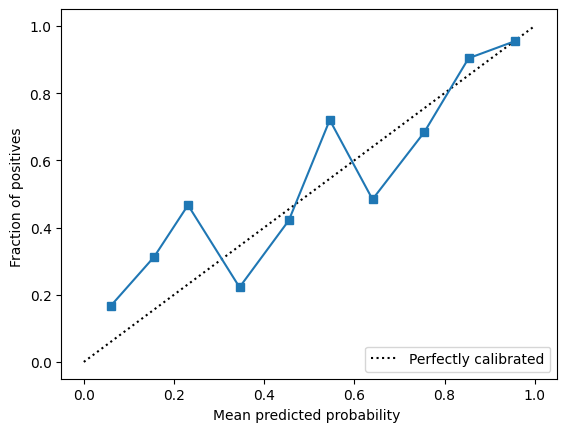

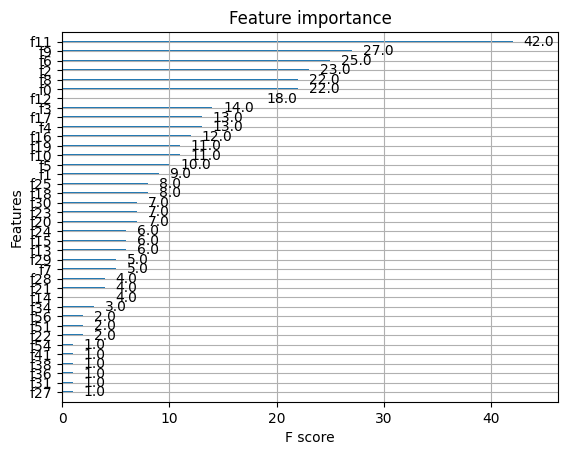

In [ ]:
#XGBoost without SMOTE()
from sklearn.calibration import calibration_curve, CalibrationDisplay
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from matplotlib.colors import LinearSegmentedColormap
from boruta import BorutaPy
def xgboost_model_no_smote(df):
  import xgboost as xgb
  drop_col=['CI candidate','CNC candidate','CNC','AzBio5SNR_bi','AzBio5SNR','AzBioQuiet','AzBio10SNR','AzBioQuiet_bi','AzBio10SNR_bi','Unnamed: 0','Unnamed: 0.1','Ear']
  X=df.drop(columns=drop_col)
  y=df['CNC candidate']
# Convert to Pandas category
  # for col in cat_col:
  #     X[col] = X[col].astype('category')
#train-test split
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=2, stratify=y)
  dmatrix=xgb.DMatrix(data=X, label=y,enable_categorical=True, feature_names=X.columns.tolist())
  xg_cl = xgb.XGBClassifier(objective='binary:logistic', n_estimators=10, seed=123) #model
  kf = KFold(n_splits=20, random_state=4, shuffle=True)
  params = {'objective':'binary:logistic',"max_depth":15}
  scaler=StandardScaler()
  num_transformer = Pipeline(steps=[
     ('scaler', StandardScaler())
   ])
   #Combine transformers into a preprocessor
  preprocessor = make_column_transformer(
     (num_transformer, num_col),
     remainder='passthrough'
   )
#pipeline
  steps= [('preprocessor',preprocessor),('model',xg_cl)]
  pipe = ImbPipeline(steps)
#fit pipeline
  pipe.fit(X_train, y_train)
#make predictions etc
  preds = pipe.predict(X_test)
  accuracy = float(np.sum(preds==y_test))/y_test.shape[0]
  print("accuracy: %f" % (accuracy))
#cv
  #params={'objective':'binary:logistic',"max_depth":10}
  xgb_cv = xgb.cv(dtrain=dmatrix, params=params, nfold=100, seed=123, num_boost_round=10, metrics="error", as_pandas=True)
  print("xgb.cv_Accuracy: %f" %((1-xgb_cv["test-error-mean"]).iloc[-1]))


#prc curve

  cm = confusion_matrix(y_test, preds)
  print(cm)
  print(classification_report(y_test, preds))
  cv_=cross_val_score(pipe, X, y, cv=kf)
  print("Accuracy: %.2f%% (%.2f%%)" % (cv_.mean()*100, cv_.std()*100))

#prc
  y_prob_xgb = pipe.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
  precision, recall, _ = precision_recall_curve(y_test, y_prob_xgb)
  disp = PrecisionRecallDisplay(precision=precision, recall=recall)
  disp.plot()
  plt.title('Precision-Recall Curve CI Candidacy')
  plt.ylim([0.0, 1.0])
  plt.xlim([0.0, 1.0])
  plt.show()

  sum_prec_recall = precision + recall
  best_index = sum_prec_recall.argmax()
  best_precision = precision[best_index]
  best_recall = recall[best_index]

  #calibr curve
  prob_true, prob_pred = calibration_curve(y_test, y_prob_xgb, n_bins=10)
  disp = CalibrationDisplay(prob_true, prob_pred, y_prob_xgb)
  disp.plot()

  print(f'Best Precision: {best_precision}')
  print(f'Best Recall: {best_recall}')
  xgb.plot_importance(xg_cl)
  plt.show()

#   gbm_param_grid = {
#      'colsample_bytree': [0.3, 0.7],
#      'n_estimators': [50],
#      'max_depth': [2, 5]
#    }
#    #regressor got better rmse than classifier
#   gbm = xgb.XGBRegressor()
#   grid_mse = GridSearchCV(estimator=gbm,param_grid=gbm_param_grid,scoring="neg_mean_squared_error",cv=kf, verbose=1)
# # # Fit grid_mse to the data
#   steps2= [('preprocessor',preprocessor),('model',grid_mse)]
#   pipe2 = ImbPipeline(steps2)
#   pipe2.fit(X_train,y_train)
# # # Print the best parameters and lowest RMSE
#   print("Best parameters found: ", grid_mse.best_params_)
#   print("Lowest RMSE found: ", np.sqrt(np.abs(grid_mse.best_score_)))

xgboost_model_no_smote(Unilateral_df)

# XGB SMOTE

accuracy: 0.799205
CV_Accuracy: 84.00% (3.17%)
[[ 63  57]
 [ 44 339]]
              precision    recall  f1-score   support

         0.0       0.59      0.53      0.56       120
         1.0       0.86      0.89      0.87       383

    accuracy                           0.80       503
   macro avg       0.72      0.71      0.71       503
weighted avg       0.79      0.80      0.80       503



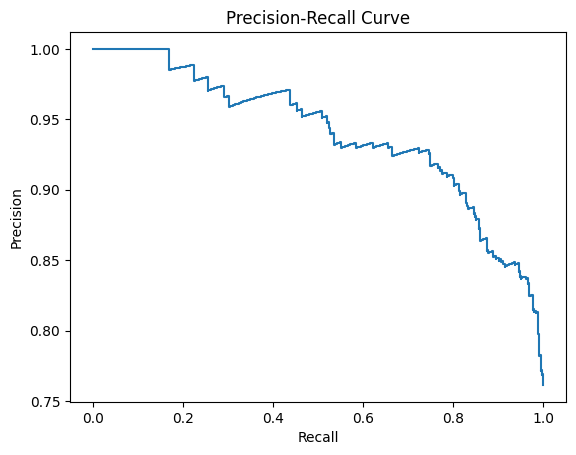

Best Precision: 0.8371040723981901
Best Recall: 0.9660574412532638


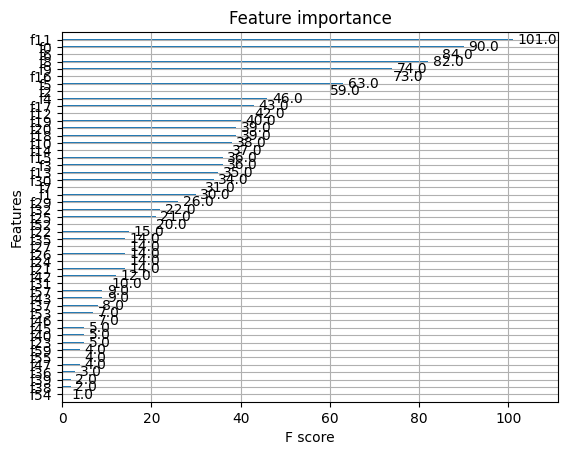

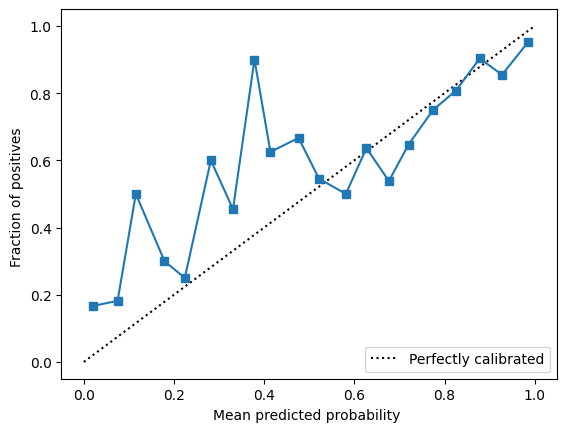

In [ ]:
# XGBoost with SMOTE()
from sklearn.calibration import calibration_curve, CalibrationDisplay
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import imblearn
from numpy import sort
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
##XGBoost
def xgboost_model_smote(df):
  import xgboost as xgb
  drop_col=['CI candidate','CNC candidate','CNC','AzBio5SNR_bi','AzBio5SNR','AzBioQuiet','AzBio10SNR','AzBioQuiet_bi','AzBio10SNR_bi','Unnamed: 0','Unnamed: 0.1','Ear']
  X=df.drop(columns=drop_col)
  y=df['CNC candidate']
# Convert to Pandas category
  # for col in cat_col:
  #     X[col] = X[col].astype('category')
#train-test split
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=2, stratify=y)
  dmatrix=xgb.DMatrix(data=X, label=y,enable_categorical=True, feature_names=X.columns.tolist())
  xg_cl = xgb.XGBClassifier(objective='binary:logistic',n_estimators=50,seed=123) #model
  kf = KFold(n_splits=20, random_state=4,shuffle=True)
  params = {'objective':'binary:logistic',"max_depth":10}
  imputer=SimpleImputer() #######temporary
  scaler = StandardScaler()
  encoder= sklearn.preprocessing.OneHotEncoder()
  num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
  ])

  # cat_transformer = Pipeline(steps=[
  #    ('imputer', SimpleImputer(strategy='most_frequent')),
  #    ('onehot', OneHotEncoder(drop='first'))
  #  ])

  binary_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent'))
  ])

# Combine transformers into a preprocessor
  preprocessor = make_column_transformer(
    (num_transformer, num_col),
    # (cat_transformer, cat_col_more),
    (binary_transformer, binary_col),
    remainder='passthrough'
  )
#pipeline
  steps=[('preprocessor',preprocessor),('over',BorderlineSMOTE()),('model',xg_cl)]
  pipe = ImbPipeline(steps)
#fit pipeline
  pipe.fit(X_train, y_train)
#make predictions etc
  preds = pipe.predict(X_test)
  accuracy = float(np.sum(preds==y_test))/y_test.shape[0]
  print("accuracy: %f" % (accuracy))
  results = cross_val_score(pipe, X, y, cv=kf)
  print("CV_Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
#cv
  # xgb_cv = xgb.cv(dtrain=dmatrix, params=params, nfold=20, seed=20, num_boost_round=10, metrics="error", as_pandas=True)
  # print("xhb.cv Accuracy: %f" %((1-xgb_cv["test-error-mean"]).iloc[-1]))
  cm = confusion_matrix(y_test, preds)
  print(cm)
  print(classification_report(y_test, preds))
#prc
  y_prob_xgb = pipe.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
  precision, recall, _ = precision_recall_curve(y_test, y_prob_xgb)
  disp = PrecisionRecallDisplay(precision=precision, recall=recall)
  disp.plot()
  plt.title('Precision-Recall Curve')
  plt.show()
  sum_prec_recall = precision + recall
  best_index = sum_prec_recall.argmax()
  best_precision = precision[best_index]
  best_recall = recall[best_index]
  print(f'Best Precision: {best_precision}')
  print(f'Best Recall: {best_recall}')
  xgb.plot_importance(xg_cl)
  plt.show()
  #calibr curve
  prob_true, prob_pred = calibration_curve(y_test, y_prob_xgb, n_bins=20)
  disp = CalibrationDisplay(prob_true, prob_pred, y_prob_xgb)
  disp.plot()
  # gbm_param_grid = {
  #    'colsample_bytree': [0.3, 0.7],
  #    'n_estimators': [50],
  #    'max_depth': [5,10]
  #  }
  # gbm = xgb.XGBRegressor()
  # grid_mse = GridSearchCV(estimator=gbm,param_grid=gbm_param_grid,scoring="neg_mean_squared_error",cv=kf, verbose=1)
  # steps2= [('preprocessor',preprocessor),('over',BorderlineSMOTE()),('model',grid_mse)]
  # pipe2 = ImbPipeline(steps2)
  # pipe2.fit(X_train,y_train)
  # print("Best parameters found: ", grid_mse.best_params_)
  # print("Lowest RMSE found: ", np.sqrt(np.abs(grid_mse.best_score_)))
xgboost_model_smote(Unilateral_df)

# Boruta Feature selection

Streaming output truncated to the last 5000 lines.
Confirmed: 	19
Tentative: 	13
Rejected: 	36
Iteration: 	68 / 100
Confirmed: 	19
Tentative: 	13
Rejected: 	36
Iteration: 	69 / 100
Confirmed: 	19
Tentative: 	13
Rejected: 	36
Iteration: 	70 / 100
Confirmed: 	19
Tentative: 	13
Rejected: 	36
Iteration: 	71 / 100
Confirmed: 	19
Tentative: 	13
Rejected: 	36
Iteration: 	72 / 100
Confirmed: 	19
Tentative: 	13
Rejected: 	36
Iteration: 	73 / 100
Confirmed: 	19
Tentative: 	13
Rejected: 	36
Iteration: 	74 / 100
Confirmed: 	19
Tentative: 	13
Rejected: 	36
Iteration: 	75 / 100
Confirmed: 	19
Tentative: 	13
Rejected: 	36
Iteration: 	76 / 100
Confirmed: 	19
Tentative: 	13
Rejected: 	36
Iteration: 	77 / 100
Confirmed: 	19
Tentative: 	13
Rejected: 	36
Iteration: 	78 / 100
Confirmed: 	19
Tentative: 	13
Rejected: 	36
Iteration: 	79 / 100
Confirmed: 	19
Tentative: 	13
Rejected: 	36
Iteration: 	80 / 100
Confirmed: 	19
Tentative: 	13
Rejected: 	36
Iteration: 	81 / 100
Confirmed: 	19
Tentative: 	13
Rejected:

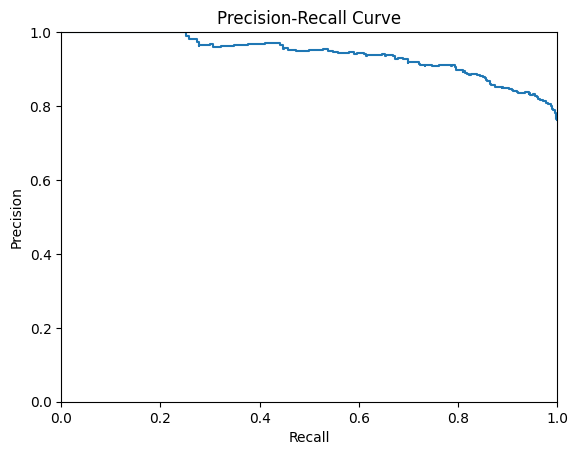

Best Precision: 0.8059701492537313
Best Recall: 0.9869451697127938
Ranking:  [ 3  1  1  1 17  1  3  5 16 23 20  1 12 20  1  2  1 12  2 24 15  1 22  2
  1  1  1  1 33  1  1  2  1 33 33 33  1 33 33 12  2  1 18  2  2 33 15  1
  1 33 33  5  9  8 33  7 33 33 10  1  5 33 25 33 20  1 33  1]
No. of significant features:  22

------Support and Ranking for each feature------
Doesn't pass the test:  pipeline-1__Age  - Ranking:  3
Passes the test:  pipeline-1__NoiseExpYrs  - Ranking:  1
Passes the test:  pipeline-1__PTA (500, 1K, 2K, 4K)  - Ranking:  1
Passes the test:  pipeline-1__PTA (500, 1K, 2K)  - Ranking:  1
Doesn't pass the test:  pipeline-1__ Low Freq PTA (250, 500)  - Ranking:  17
Passes the test:  pipeline-1__ Low Frequency PTA (125, 250, 500)  - Ranking:  1
Doesn't pass the test:  pipeline-1__Patient Data:: Age of Onset  - Ranking:  3
Doesn't pass the test:  pipeline-1__Patient Data:: Years since No HA Use  - Ranking:  5
Doesn't pass the test:  pipeline-1__HLdur  - Ranking:  16
Doesn't 

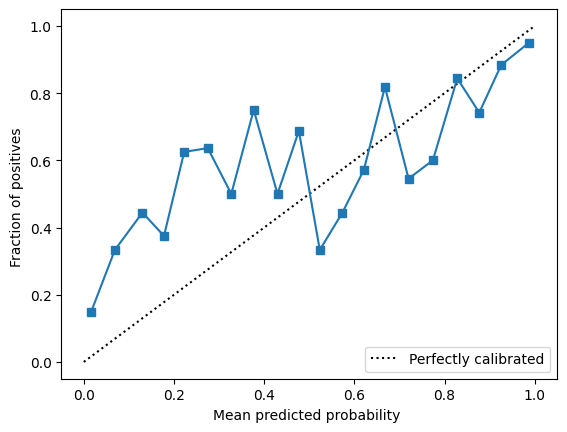

In [ ]:
#selected features:
from boruta import BorutaPy
import numpy as np
np.int=int
np.float=float
np.bool=bool
import imblearn
import xgboost as xgb
from numpy import sort
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
def boruta(df):
  drop_col=['CI candidate','CNC candidate','CNC','AzBio5SNR_bi','AzBio5SNR','AzBioQuiet','AzBio10SNR','AzBioQuiet_bi','AzBio10SNR_bi','Unnamed: 0','Unnamed: 0.1','Ear']
  X=df.drop(columns=drop_col)
  y=df['CNC candidate']
# Convert to Pandas category
  # for col in cat_col:
  #     X[col] = X[col].astype('category')
#train-test split
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=2, stratify=y)
  dmatrix=xgb.DMatrix(data=X, label=y,enable_categorical=True, feature_names=X.columns.tolist())
  xg_cl = xgb.XGBClassifier(objective='binary:logistic',n_estimators=50,seed=123) #model
  kf = KFold(n_splits=20, random_state=4,shuffle=True)
  params = {'objective':'binary:logistic',"max_depth":10}
  imputer=SimpleImputer() #######temporary
  scaler = StandardScaler()
  num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
  ])
  binary_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent'))
  ])
  preprocessor = make_column_transformer(
    (num_transformer, num_col),
    # (cat_transformer, cat_col_more),
    (binary_transformer, binary_col),
    remainder='passthrough')
#pipeline
  boruta_selector = BorutaPy(estimator=xg_cl, n_estimators='auto', verbose=2, random_state=1)
  X_train_transformed = preprocessor.fit_transform(X_train)
  X_train_transformed_df=pd.DataFrame(X_train_transformed, columns=preprocessor.get_feature_names_out())
  feature_names = preprocessor.get_feature_names_out()
  steps=[('preprocessor',preprocessor),('over',BorderlineSMOTE()),('boruta',boruta_selector),('model',xg_cl)]
  pipe = ImbPipeline(steps)
  pipe.fit(X_train, y_train)
  preds = pipe.predict(X_test)
  accuracy = float(np.sum(preds==y_test))/y_test.shape[0]
  print("accuracy: %f" % (accuracy))
  results = cross_val_score(pipe, X, y, cv=kf)
  print("CV_Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
#cv
  xgb_cv = xgb.cv(dtrain=dmatrix, params=params, nfold=20, seed=20, num_boost_round=10, metrics="error", as_pandas=True)
  print("xgb.cv Accuracy: %f" %((1-xgb_cv["test-error-mean"]).iloc[-1]))
  cm = confusion_matrix(y_test, preds)
  print(cm)
  print(classification_report(y_test, preds))
#prc
  y_prob_xgb = pipe.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
  precision, recall, _ = precision_recall_curve(y_test, y_prob_xgb)
  disp = PrecisionRecallDisplay(precision=precision, recall=recall)
  disp.plot()
  plt.ylim([0.0, 1.0000001])
  plt.xlim([0.0, 1.0000001])
  plt.title('Precision-Recall Curve')
  plt.show()
  sum_prec_recall = precision + recall
  best_index = sum_prec_recall.argmax()
  best_precision = precision[best_index]
  best_recall = recall[best_index]
  print(f'Best Precision: {best_precision}')
  print(f'Best Recall: {best_recall}')
  #calibr curve
  prob_true, prob_pred = calibration_curve(y_test, y_prob_xgb, n_bins=20)
  disp = CalibrationDisplay(prob_true, prob_pred, y_prob_xgb)
  disp.plot()

  print("Ranking: ",boruta_selector.ranking_)
  print("No. of significant features: ", boruta_selector.n_features_)
  X_train_transformed_df.columns[boruta_selector.support_]

  print("\n------Support and Ranking for each feature------")
  for i in range(len(boruta_selector.support_)):
       if boruta_selector.support_[i]:
           print("Passes the test: ", X_train_transformed_df.columns[i],
               " - Ranking: ", boruta_selector.ranking_[i])
       else:
           print("Doesn't pass the test: ",
               X_train_transformed_df.columns[i], " - Ranking: ", boruta_selector.ranking_[i])
boruta(Unilateral_df)

Streaming output truncated to the last 5000 lines.
Confirmed: 	4
Tentative: 	2
Rejected: 	54
Iteration: 	52 / 100
Confirmed: 	4
Tentative: 	2
Rejected: 	54
Iteration: 	53 / 100
Confirmed: 	4
Tentative: 	2
Rejected: 	54
Iteration: 	54 / 100
Confirmed: 	4
Tentative: 	2
Rejected: 	54
Iteration: 	55 / 100
Confirmed: 	4
Tentative: 	2
Rejected: 	54
Iteration: 	56 / 100
Confirmed: 	4
Tentative: 	2
Rejected: 	54
Iteration: 	57 / 100
Confirmed: 	4
Tentative: 	2
Rejected: 	54
Iteration: 	58 / 100
Confirmed: 	4
Tentative: 	2
Rejected: 	54
Iteration: 	59 / 100
Confirmed: 	4
Tentative: 	2
Rejected: 	54
Iteration: 	60 / 100
Confirmed: 	4
Tentative: 	2
Rejected: 	54
Iteration: 	61 / 100
Confirmed: 	4
Tentative: 	2
Rejected: 	54
Iteration: 	62 / 100
Confirmed: 	4
Tentative: 	2
Rejected: 	54
Iteration: 	63 / 100
Confirmed: 	4
Tentative: 	2
Rejected: 	54
Iteration: 	64 / 100
Confirmed: 	4
Tentative: 	2
Rejected: 	54
Iteration: 	65 / 100
Confirmed: 	4
Tentative: 	2
Rejected: 	54
Iteration: 	66 / 100
Conf

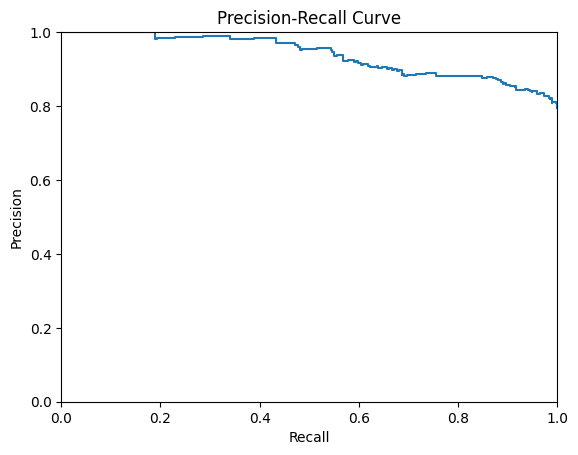

Best Precision: 0.8205128205128205
Best Recall: 0.9896907216494846
Ranking:  [16 20  1  1  1  6 25 11 15  8 29  1 27 25  5  8 13 13 27 30 31 35 48 20
 34 33 25 35 48 20  7  4 11 48 48  3 48 20 48 48 16 48 31 48 48 48 48 18
 48 48 48 48 23 10 48 38 48 37 48  2]
No. of significant features:  4

------Support and Ranking for each feature------
Doesn't pass the test:  pipeline-1__Age  - Ranking:  16
Doesn't pass the test:  pipeline-1__NoiseExpYrs  - Ranking:  20
Passes the test:  pipeline-1__PTA (500, 1K, 2K, 4K)  - Ranking:  1
Passes the test:  pipeline-1__PTA (500, 1K, 2K)  - Ranking:  1
Passes the test:  pipeline-1__ Low Freq PTA (250, 500)  - Ranking:  1
Doesn't pass the test:  pipeline-1__ Low Frequency PTA (125, 250, 500)  - Ranking:  6
Doesn't pass the test:  pipeline-1__Patient Data:: Age of Onset  - Ranking:  25
Doesn't pass the test:  pipeline-1__Patient Data:: Years since No HA Use  - Ranking:  11
Doesn't pass the test:  pipeline-1__HLdur  - Ranking:  15
Doesn't pass the test:  

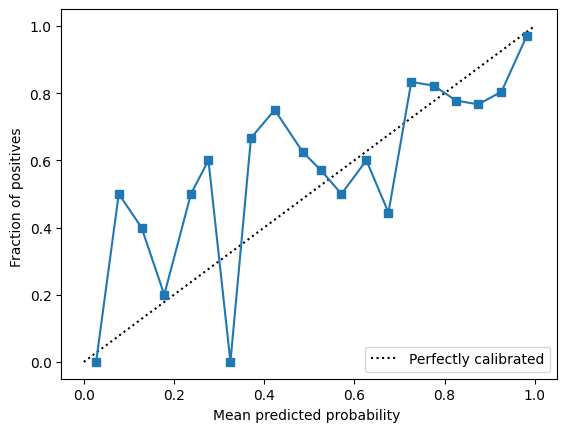

In [ ]:
#selected features:
from boruta import BorutaPy
import numpy as np
np.int=int
np.float=float
np.bool=bool
import imblearn
import xgboost as xgb
from numpy import sort
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
def boruta(df):
  semi_blank_col=['NoiseExp','NoiseExpYrs','Vertigo','Imbalance','FamilyHistoryHL','Prelingual']
  df = df.dropna(subset=semi_blank_col, how='all')
  drop_col=['CI candidate','CNC candidate','CNC','AzBio5SNR_bi','AzBio5SNR','AzBioQuiet','AzBio10SNR','AzBioQuiet_bi','AzBio10SNR_bi','Unnamed: 0','Unnamed: 0.1','Ear']
  X=df.drop(columns=drop_col)
  y=df['CNC candidate']
# Convert to Pandas category
  # for col in cat_col:
  #     X[col] = X[col].astype('category')
#train-test split
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=2, stratify=y)
  dmatrix=xgb.DMatrix(data=X, label=y,enable_categorical=True, feature_names=X.columns.tolist())
  xg_cl = xgb.XGBClassifier(objective='binary:logistic',n_estimators=50,seed=123) #model
  kf = KFold(n_splits=20, random_state=4,shuffle=True)
  params = {'objective':'binary:logistic',"max_depth":10}
  imputer=SimpleImputer() #######temporary
  scaler = StandardScaler()
  num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
  ])
  binary_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent'))
  ])
  preprocessor = make_column_transformer(
    (num_transformer, num_col),
    # (cat_transformer, cat_col_more),
    (binary_transformer, binary_col),
    remainder='passthrough')
#pipeline
  boruta_selector = BorutaPy(estimator=xg_cl, n_estimators='auto', verbose=2, random_state=1)
  X_train_transformed = preprocessor.fit_transform(X_train)
  X_train_transformed_df=pd.DataFrame(X_train_transformed, columns=preprocessor.get_feature_names_out())
  feature_names = preprocessor.get_feature_names_out()
  steps=[('preprocessor',preprocessor),('boruta',boruta_selector),('model',xg_cl)]
  pipe = ImbPipeline(steps)
  pipe.fit(X_train, y_train)
  preds = pipe.predict(X_test)
  accuracy = float(np.sum(preds==y_test))/y_test.shape[0]
  print("accuracy: %f" % (accuracy))
  results = cross_val_score(pipe, X, y, cv=kf)
  print("CV_Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
#cv
  xgb_cv = xgb.cv(dtrain=dmatrix, params=params, nfold=20, seed=20, num_boost_round=10, metrics="error", as_pandas=True)
  print("xgb.cv Accuracy: %f" %((1-xgb_cv["test-error-mean"]).iloc[-1]))
  cm = confusion_matrix(y_test, preds)
  print(cm)
  print(classification_report(y_test, preds))
#prc
  y_prob_xgb = pipe.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
  precision, recall, _ = precision_recall_curve(y_test, y_prob_xgb)
  disp = PrecisionRecallDisplay(precision=precision, recall=recall)
  disp.plot()
  plt.ylim([0.0, 1.0000001])
  plt.xlim([0.0, 1.0000001])
  plt.title('Precision-Recall Curve')
  plt.show()
  sum_prec_recall = precision + recall
  best_index = sum_prec_recall.argmax()
  best_precision = precision[best_index]
  best_recall = recall[best_index]
  print(f'Best Precision: {best_precision}')
  print(f'Best Recall: {best_recall}')
  #calibr curve
  prob_true, prob_pred = calibration_curve(y_test, y_prob_xgb, n_bins=20)
  disp = CalibrationDisplay(prob_true, prob_pred, y_prob_xgb)
  disp.plot()

  print("Ranking: ",boruta_selector.ranking_)
  print("No. of significant features: ", boruta_selector.n_features_)
  X_train_transformed_df.columns[boruta_selector.support_]

  print("\n------Support and Ranking for each feature------")
  for i in range(len(boruta_selector.support_)):
       if boruta_selector.support_[i]:
           print("Passes the test: ", X_train_transformed_df.columns[i],
               " - Ranking: ", boruta_selector.ranking_[i])
       else:
           print("Doesn't pass the test: ",
               X_train_transformed_df.columns[i], " - Ranking: ", boruta_selector.ranking_[i])
boruta(Unilateral_df)



# PCA

AssertionError: 

<Figure size 640x480 with 0 Axes>

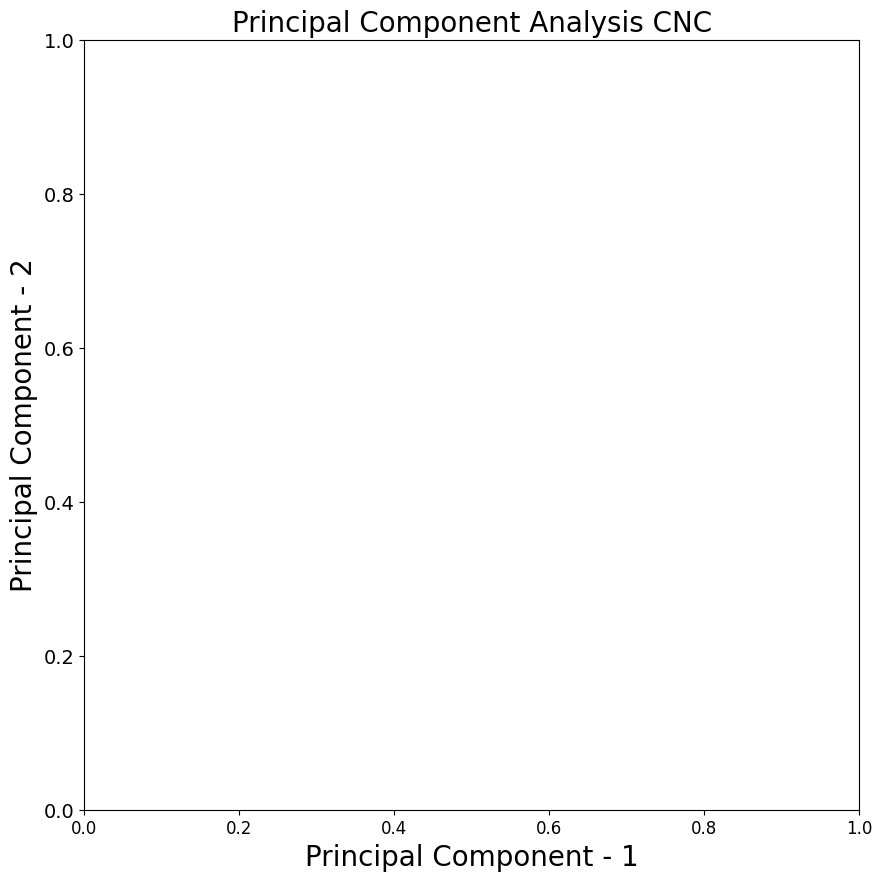

In [ ]:
from sklearn.calibration import calibration_curve
from sklearn.calibration import CalibratedClassifierCV
from sklearn.calibration import CalibrationDisplay

from sklearn.decomposition import PCA
from matplotlib.colors import LinearSegmentedColormap
from sklearn.calibration import calibration_curve
from sklearn.calibration import CalibratedClassifierCV
from sklearn.calibration import CalibrationDisplay

from sklearn.decomposition import PCA
from matplotlib.colors import LinearSegmentedColormap
##XGBoost
def PCA_U(df):
  semi_blank_col=['NoiseExp','NoiseExpYrs','Vertigo','Imbalance','FamilyHistoryHL','Prelingual']
  df = df.dropna(subset=semi_blank_col, how='all')
  import xgboost as xgb
  drop_col=['CI candidate','CNC candidate','CNC','AzBio5SNR_bi','AzBio5SNR','AzBioQuiet','AzBio10SNR','AzBioQuiet_bi','AzBio10SNR_bi','Unnamed: 0','Unnamed: 0.1','Ear']
  X=df.drop(columns=drop_col)
  y=df['CNC candidate']
# Convert to Pandas category
  # for col in cat_col:
  #     X[col] = X[col].astype('category')
#train-test split
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=2, stratify=y)
  #create dmatrix
  dmatrix=xgb.DMatrix(data=X_train, label=y_train,enable_categorical=True, feature_names=X.columns.tolist())
  xg_cl = xgb.XGBClassifier(objective='binary:logistic', n_estimators=50, seed=123) #model
  kf = KFold(n_splits=20, random_state=4, shuffle=True)
  params = {'objective':'binary:logistic','colsample_bytree': 0.3, 'max_depth': 5,'eta':0.1}
  imputer=SimpleImputer() #######needed for PCA
  scaler=StandardScaler()
  pca=PCA(n_components=2)
  num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])
  binary_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent'))])
# Combine transformers into a preprocessor
  preprocessor = make_column_transformer(
    (num_transformer, num_col),
    (binary_transformer, binary_col),
    remainder='passthrough')
#pipeline
  steps= [('preprocessor',preprocessor),('pca',pca)]
  pipe = ImbPipeline(steps)
#fit pipeline
  pca_data=pipe.fit_transform(X_train, y_train)
#PCA
  pca_df=pd.DataFrame(data=pca_data, columns = ['principal component 1', 'principal component 2'])
  pca_df.tail()
  plt.figure()
  plt.figure(figsize=(10,10))
  plt.xticks(fontsize=12)
  plt.yticks(fontsize=14)
  plt.xlabel('Principal Component - 1',fontsize=20)
  plt.ylabel('Principal Component - 2',fontsize=20)
  plt.title("Principal Component Analysis CNC",fontsize=20)
  targets = [1, 0]
  colors = ['r', 'g']
  features=df.columns.tolist()
  features_labels = np.append(features,'label')
  for target, color in zip(targets,colors):
      indicesToKeep = df['Ear'] == target
      plt.scatter(pca_df.loc[indicesToKeep, 'principal component 1']
               , pca_df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)
  plt.legend(targets,prop={'size': 15})
  plt.show()
  #print('Explained variability per principal component: {}'.format(pca_df.explained_variance_ratio_))
  import seaborn as sns
  plt.figure(figsize=(16,10))
  sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue=df['Age'],
    palette=sns.color_palette("hls", 79),
    data=pca_df,
    legend="full",
    alpha=0.3
  )
  plt.show()
  # total_explained_variance = pca.explained_variance_ratio_.cumsum()
  # n_over_95 = len(total_explained_variance[total_explained_variance >= .95])

PCA_U(Unilateral_df)

# Manual Feature Selection

In [ ]:
def manual_prepare_dataset_CNC(df):
  df=cleaning(df)
  df=cand_fix_CNC(df)
  return df
def manual_prepare_dataset_CI(df):
  df=cleaning(df)
  df=cand_fix_CI(df)
  return df
#Unilateral_export_df=cleaning(Unilateral_df_raw)
#Unilateral_export_df.to_excel('Unilateral_export_df.xlsx', index=True)
M_Unilateral_CNC=manual_prepare_dataset_CNC(Non_azCNC_filtered_unil)
M_Unilateral_Az=manual_prepare_dataset_CI(Non_azCNC_filtered_unil)
feature_cols=[
    'WRS',
    'PTA (500, 1K, 2K, 4K)','PTA (500, 1K, 2K)',' Low Freq PTA (250, 500)',' Low Frequency PTA (125, 250, 500)',
   # 'HLprg'
  #  'Age'
    ]
new_num_col=[
    'WRS',
    'PTA (500, 1K, 2K, 4K)',
    'PTA (500, 1K, 2K)',
    ' Low Freq PTA (250, 500)',
    ' Low Frequency PTA (125, 250, 500)',
   # 'Age',
    ]
new_cat_col=[
    'HLprg'
    ]


<ipython-input-2-d847cc03c3f6>:101: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'True' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[(df['CNC']<=40),'CNC candidate']=True
<ipython-input-2-d847cc03c3f6>:101: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'True' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[(df['CNC']<=40),'CNC candidate']=True


<ipython-input-5-df49827088d8>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['HLprg'] = df['HLprg'].astype('category')


accuracy: 0.790932
CV_Accuracy: 0.811899
[[ 65  34]
 [ 49 249]]
              precision    recall  f1-score   support

         0.0       0.57      0.66      0.61        99
         1.0       0.88      0.84      0.86       298

    accuracy                           0.79       397
   macro avg       0.73      0.75      0.73       397
weighted avg       0.80      0.79      0.80       397

Accuracy: 80.84% (8.17%)


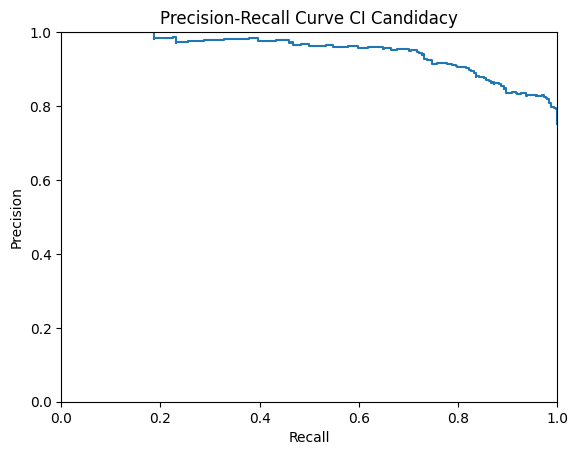

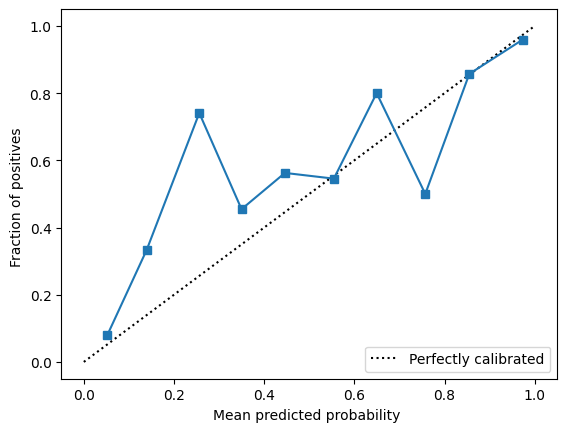

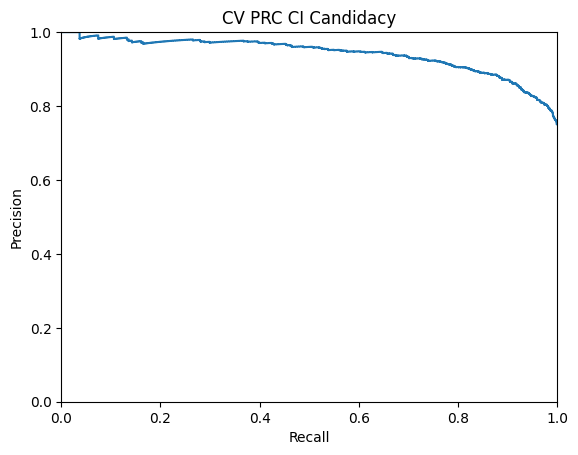

Fitting 100 folds for each of 36 candidates, totalling 3600 fits
Best parameters found:  {'colsample_bytree': 0.7, 'eta': 0.1, 'max_depth': 25, 'n_estimators': 100}
Best metric found:  0.9435613233990108
[[ 66  33]
 [ 43 255]]
              precision    recall  f1-score   support

         0.0       0.61      0.67      0.63        99
         1.0       0.89      0.86      0.87       298

    accuracy                           0.81       397
   macro avg       0.75      0.76      0.75       397
weighted avg       0.82      0.81      0.81       397



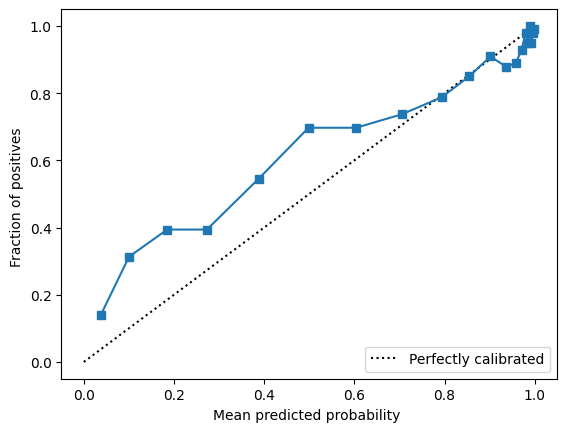

In [ ]:
from sklearn.calibration import calibration_curve, CalibrationDisplay
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
import imblearn
from numpy import sort
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
import xgboost as xgb
##XGBoost
def Manual(df):
  df['HLprg'] = df['HLprg'].astype('category')
  df=df.dropna(subset=feature_cols)
  X=df[feature_cols]
  y=df['CNC candidate']
# Convert to Pandas category
  # for col in cat_col:
  #     X[col] = X[col].astype('category')
#train-test split
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=2, stratify=y)
  dmatrix=xgb.DMatrix(data=X, label=y,enable_categorical=True, feature_names=X.columns.tolist())
  xg_cl = xgb.XGBClassifier(objective='binary:logistic',n_estimators=50,seed=123) #model
  kf = KFold(n_splits=100, random_state=4,shuffle=True)
  params = {'objective':'binary:logistic','colsample_bytree': 0.7, 'eta': 0.1, 'max_depth': 15}
  imputer=SimpleImputer() #######temporary
  scaler = StandardScaler()
  encoder= sklearn.preprocessing.OneHotEncoder()
  num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
  ])

  # cat_transformer = Pipeline(steps=[
  #     ('onehot', OneHotEncoder(drop='first'))
  #   ])

  # binary_transformer = Pipeline(steps=[
  #   ('imputer', SimpleImputer(strategy='most_frequent'))
  # ])

# Combine transformers into a preprocessor
  preprocessor = make_column_transformer(
    (num_transformer, new_num_col),
   # (cat_transformer, new_cat_col),
    remainder='passthrough'
  )
#pipeline
  steps=[('preprocessor',preprocessor),
    ('over',BorderlineSMOTE()),
    ('model',xg_cl)
    ]
  pipe = ImbPipeline(steps)
#fit pipeline
  pipe.fit(X_train, y_train)
#make predictions etc
  preds = pipe.predict(X_test)
  accuracy = float(np.sum(preds==y_test))/y_test.shape[0]
  print("accuracy: %f" % (accuracy))
#cv
  #params={'objective':'binary:logistic',"max_depth":10}
  xgb_cv = xgb.cv(dtrain=dmatrix, params=params, nfold=20, seed=123, num_boost_round=10, metrics="error", as_pandas=True)
  print("CV_Accuracy: %f" %((1-xgb_cv["test-error-mean"]).iloc[-1]))


#prc curve

  cm = confusion_matrix(y_test, preds)
  print(cm)
  print(classification_report(y_test, preds))
  cv_=cross_val_score(pipe, X, y, scoring="f1_weighted",cv=kf)
  print("Accuracy: %.2f%% (%.2f%%)" % (cv_.mean()*100, cv_.std()*100))
  cv_pred=cross_val_predict(pipe,X,y,cv=kf)
#prc
  y_prob_xgb = pipe.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
  precision, recall, _ = precision_recall_curve(y_test, y_prob_xgb)
  disp = PrecisionRecallDisplay(precision=precision, recall=recall)
  disp.plot()
  plt.title('Precision-Recall Curve CI Candidacy')
  plt.ylim([0.0, 1.0])
  plt.xlim([0.0, 1.0])
  plt.show()
  sum_prec_recall = precision + recall
  best_index = sum_prec_recall.argmax()
  best_precision = precision[best_index]
  best_recall = recall[best_index]
  #calibr curve
  prob_true, prob_pred = calibration_curve(y_test, y_prob_xgb, n_bins=10)
  disp = CalibrationDisplay(prob_true, prob_pred, y_prob_xgb)
  disp.plot()
#cv curves:
  # y_prob_cv = cross_val_predict(pipe, X, y, cv=kf, method='predict_proba')  # Get probabilities for the positive class
  # #print(y_prob_cv)
  # y_prob_cv1 = y_prob_cv[:, 1]
  #print(y_prob_cv1)
  y_real = []
  y_proba = []
  for i, (train_index, test_index) in enumerate(kf.split(X)):
    Xtrain, Xtest = X.iloc[train_index], X.iloc[test_index]
    ytrain, ytest = y.iloc[train_index], y.iloc[test_index]
    pipe.fit(Xtrain, ytrain)
    pred_proba = pipe.predict_proba(Xtest)
    # precision, recall, _ = precision_recall_curve(ytest, pred_proba[:,1])
    # y_real.append(ytest)
    # y_proba.append(pred_proba[:,1])
    y_real.extend(ytest)
    y_proba.extend(pred_proba[:, 1])
    # y_real = np.concatenate(y_real)
    # y_proba = np.concatenate(y_proba)
    # precision, recall, _ = precision_recall_curve(y_real, y_proba)
  precision, recall, _ = precision_recall_curve(np.array(y_real), np.array(y_proba))
  disp1 = PrecisionRecallDisplay(precision=precision, recall=recall)
  disp1.plot()
  plt.title('CV PRC CI Candidacy')
  plt.ylim([0.0, 1.0])
  plt.xlim([0.0, 1.0])
  plt.show()
  prob_true, prob_pred = calibration_curve(y_real, y_proba, n_bins=20, strategy='quantile')
  disp = CalibrationDisplay(prob_true, prob_pred, y_proba)
  disp.plot()

  gbm_param_grid = {
      'colsample_bytree': [0.3,0.5,0.7],
      'n_estimators': [50,100],
      'max_depth': [15,25,50],
      'eta': [0.1,0.5]
     }
  gbm = xgb.XGBRegressor()
  grid_mse = GridSearchCV(estimator=xg_cl,param_grid=gbm_param_grid,scoring='f1_micro',cv=kf, verbose=1)
  steps2= [('preprocessor',preprocessor),('over',BorderlineSMOTE()),('model',grid_mse)]
  pipe2 = ImbPipeline(steps2)
  pipe2.fit(X_train,y_train)
  print("Best parameters found: ", grid_mse.best_params_)
  print("Best metric found: ", np.sqrt(np.abs(grid_mse.best_score_)))
  pipe2.predict(X_test)
  preds2 = pipe2.predict(X_test)
  cm = confusion_matrix(y_test, preds2)
  print(cm)
  print(classification_report(y_test, preds2))
#tune directly to F1 or recall
Manual(M_Unilateral_CNC)